In [1]:
import pandas as pd
df = pd.read_csv (r'C:\Users\ppatil1\Downloads\DAX-Freshers-Training-main\DAX-Freshers-Training-main\healthcare-dataset-stroke-data.csv')

In [42]:
df.head(100)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2458,Female,78.0,0,0,Yes,Private,Rural,235.63,32.3,never smoked,1
96,35512,Female,70.0,0,0,Yes,Self-employed,Rural,76.34,24.4,formerly smoked,1
97,56841,Male,58.0,0,1,Yes,Private,Rural,240.59,31.4,smokes,1
98,8154,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1


In [5]:
len(df) #total no of records

5110

In [8]:
df.isna().sum().sum() #Count NaN values under an entire DataFrame

201

In [15]:
bmi_mean=df['bmi'].mean()    #mean ,median ,mode for BMI column
bmi_median=df['bmi'].median()
bmi_std_deviation=df['bmi'].std() 

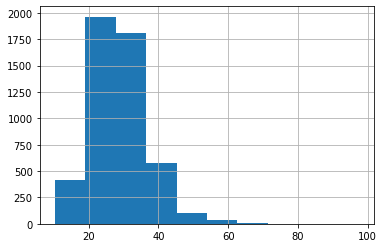

In [19]:
df["bmi"].hist();
#it shows that most people is having bmi count in range of 20 to 40

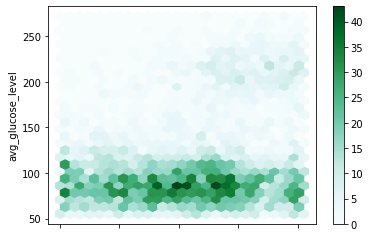

In [29]:
df.plot.hexbin(x="age",y="avg_glucose_level",gridsize=25);

#this grapoh shows that avg glucose level of most of the age group is around 80-100

In [31]:
df['bmi'].isna().sum() #null values in bmi

201

In [35]:
percentage_of_null_in_bmi= df['bmi'].isna().sum() * 100 / len(df)

In [36]:
percentage_of_null_in_bmi  #percentage of null values in bmi

3.9334637964774952

In [39]:

df['bmi'].fillna(df['bmi'].mean(), inplace=True)
##To insert the mean value of bmi column into null values

In [40]:
df['bmi'].isna().sum()  #here we can check that null values are removed from bmi column

0

In [44]:

cols = ['age', 'bmi'] #( one or more column )deleting outliers in pandas

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [53]:
from sklearn.preprocessing import StandardScaler
columnlist=['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']
scale=StandardScaler()
scaled_df =df[['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]
scaled_df=scale.fit_transform(scaled_df)
print(scaled_df)


[[-1.30318495e+00  1.04433748e+00 -3.25323481e-01 ...  2.74315576e+00
   1.25420008e+00  4.38864018e+00]
 [ 7.12544254e-01  7.81005936e-01 -3.25323481e-01 ...  2.15240128e+00
   9.28044021e-02  4.38864018e+00]
 [-2.59809850e-01  1.61488917e+00 -3.25323481e-01 ...  4.22344384e-03
   6.35794588e-01  4.38864018e+00]
 ...
 [-7.98330609e-01 -3.60097438e-01 -3.25323481e-01 ... -5.07332458e-01
   3.49216434e-01 -2.27861014e-01]
 [ 4.43226923e-02  3.42120023e-01 -3.25323481e-01 ...  1.35104550e+00
  -4.04936602e-01 -2.27861014e-01]
 [ 3.81696089e-01  3.48998838e-02 -3.25323481e-01 ... -4.56243796e-01
  -3.14438237e-01 -2.27861014e-01]]


In [55]:
from sklearn.preprocessing import LabelEncoder

df_categorical=df[['gender','ever_married','work_type','Residence_type','smoking_status']]

evermarried_encoder = LabelEncoder()
evermarried_encoder.fit(df_categorical['ever_married'])
evermarried_values=evermarried_encoder.transform(df_categorical['ever_married'])
print(evermarried_values[1:20])

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0]


In [56]:

residencetype_encoder = LabelEncoder()
residencetype_encoder.fit(df_categorical['Residence_type'])
residencetype_values=residencetype_encoder.transform(df_categorical['Residence_type'])
print(residencetype_values[1:20])


gender_encoder = LabelEncoder()
gender_encoder.fit(df_categorical['gender'])
gender_values=gender_encoder.transform(df_categorical['gender'])
print(gender_values[1:20])


work_type_encoder = LabelEncoder()
work_type_encoder.fit(df_categorical['work_type'])
work_type_values=work_type_encoder.transform(df_categorical['work_type'])
print(work_type_values[1:20])


smokingstatus_encoder = LabelEncoder()
smokingstatus_encoder.fit(df_categorical['smoking_status'])
smokingstatus_values=smokingstatus_encoder.transform(df_categorical['smoking_status'])
print(smokingstatus_values[1:20])



[0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1]
[0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1]
[3 2 2 3 2 2 2 2 2 2 0 2 2 2 3 2 2 2 0]
[2 2 3 2 1 2 2 0 0 2 3 3 0 2 2 3 3 2 0]
